In [6]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

### DESCRIZIONE del PROBLEMA 
Il dataset in analisi contiene informazioni riguardanti il composto chimico CO2, l'anidride carbonica. In particolare volto all'analisi e alla predizione dei suoi componenti nel corso degli anni,  dal 1751 al 2010. 
L'obbiettivo del progetto è quello di predirre una variabile continua.

In [7]:
dataset = pd.read_csv('global.csv')

In [8]:
dataset.head(-5)

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN
...,...,...,...,...,...,...,...,...
250,2001,6927,1312,2840,2492,237,46,1.12
251,2002,6996,1344,2831,2521,252,48,1.12
252,2003,7416,1391,2959,2743,276,48,1.17
253,2004,7807,1437,3053,2967,298,53,1.21


Le Features del dataset sono le seguenti, visibili nella tabella del dataset:
1. Gas Fuel: produzione di CO2 da parte della combustione a gas 
2. Liquid Fuel: produzione di CO2 da parte della combustione a liquido
3. Solid Fuel: produzione di CO2 da parte della combustione a solido
4. Cement: produzione di CO2 da parte della produzione del cemento
5. Gas Flaring: produzione CO2 generata dalla comustione di gas naturale in eccesso estratto insieme al petrolio
6. Per Capita: produzione media di CO2 per persona 

La variabile da predirre è: 
'total', espressa in milioni di tonnellate, che rappresenta la produzione totale di CO2 per anno.

Le varibili delle feature sono continue. 

id identifica univocamente i record del dataset, ma non avendo alcuna importanza ai fini della previzione, si procede a sostituire l'indice del dataframe pandas con  la colonna 'Year'.

In [9]:
dataset.set_index('Year',inplace=True)
dataset.head()

,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
Year,,,,,,,
1751,3,0,0,3,0,0,NaN
1752,3,0,0,3,0,0,NaN
1753,3,0,0,3,0,0,NaN
1754,3,0,0,3,0,0,NaN
1755,3,0,0,3,0,0,NaN


In [10]:
dataset.tail()

,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
Year,,,,,,,
2006,8370,1525,3089,3339,356,61,1.27
2007,8566,1572,3081,3464,382,68,1.28
2008,8783,1631,3122,3571,388,71,1.30
2009,8740,1585,3056,3620,413,66,1.28
2010,9167,1702,3114,3842,450,59,1.33


Ora analiziamo le statistiche per ogni feature.

In [11]:
dataset.describe()

,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
count,260.000000,260.00000,260.000000,260.000000,260.000000,260.000000,61.000000
mean,1402.788462,185.20000,495.819231,674.569231,34.161538,13.065385,1.054754
std,2253.098527,396.58556,934.308074,868.368580,78.899604,26.311315,0.178630
min,3.000000,0.00000,0.000000,3.000000,0.000000,0.000000,0.640000
25%,12.750000,0.00000,0.000000,12.750000,0.000000,0.000000,0.940000
50%,239.500000,0.00000,3.000000,236.000000,0.000000,0.000000,1.120000
75%,1385.000000,59.50000,279.250000,1023.500000,12.000000,0.000000,1.170000
max,9167.000000,1702.00000,3122.000000,3842.000000,450.000000,110.000000,1.330000


In [12]:
dataset.head(120)

,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
Year,,,,,,,
1751,3,0,0,3,0,0,NaN
1752,3,0,0,3,0,0,NaN
1753,3,0,0,3,0,0,NaN
1754,3,0,0,3,0,0,NaN
1755,3,0,0,3,0,0,NaN
...,...,...,...,...,...,...,...
1866,122,0,0,122,0,0,NaN
1867,130,0,0,130,0,0,NaN
1868,135,0,0,134,0,0,NaN


Analizzando il dataset è possibile notare che dall'anno 1751 al 1850 circa, periodo in cui ebbe inizio la prima rivoluzione industriale, le emissioni dovute ai combustibili solidi iniziano a incrementare in maniera lieve, a causa dell'utilizzo del carbone.
Per il nostro studio, comunque, questo periodo è trascurabile.
Iniziamo a prendere in considerazione i dati dal 1850, ovvero anno di inizio della seconda rivoluzione industriale, nella quale la quantità di rilascio di anidride carbonica nell'aria iniziò ad incrementare in modo esponenziale.

In [13]:
dataset = dataset.loc[1850:]

In [14]:
dataset

,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
Year,,,,,,,
1850,54,0,0,54,0,0,NaN
1851,54,0,0,54,0,0,NaN
1852,57,0,0,57,0,0,NaN
1853,59,0,0,59,0,0,NaN
1854,69,0,0,69,0,0,NaN
...,...,...,...,...,...,...,...
2006,8370,1525,3089,3339,356,61,1.27
2007,8566,1572,3081,3464,382,68,1.28
2008,8783,1631,3122,3571,388,71,1.30


### RILEVAZIONE DEI DATI NULLI 

Osserviamo quanti valori nulli sono presenti nel dataset: 


In [15]:
dataset.shape[0]-dataset.count()

Total            0
Gas Fuel         0
Liquid Fuel      0
Solid Fuel       0
Cement           0
Gas Flaring      0
Per Capita     100
dtype: int64

Ricerchiamo i valori Nan e li sostituiamo con '0' i valori nulli, così da non avere problemi con essi nello studio dei dati.

In [16]:
dataset.fillna(0
              )

,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
Year,,,,,,,
1850,54,0,0,54,0,0,0.00
1851,54,0,0,54,0,0,0.00
1852,57,0,0,57,0,0,0.00
1853,59,0,0,59,0,0,0.00
1854,69,0,0,69,0,0,0.00
...,...,...,...,...,...,...,...
2006,8370,1525,3089,3339,356,61,1.27
2007,8566,1572,3081,3464,382,68,1.28
2008,8783,1631,3122,3571,388,71,1.30


In [17]:
dataset.describe()

,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,61.000000
mean,2257.583851,299.080745,800.701863,1081.577640,55.167702,21.099379,1.054754
std,2507.285865,469.387646,1080.468485,884.747793,94.397314,30.823125,0.178630
min,54.000000,0.000000,0.000000,54.000000,0.000000,0.000000,0.640000
25%,356.000000,2.000000,8.000000,345.000000,0.000000,0.000000,0.940000
50%,983.000000,25.000000,147.000000,862.000000,7.000000,0.000000,1.120000
75%,4053.000000,493.000000,1839.000000,1556.000000,78.000000,41.000000,1.170000
max,9167.000000,1702.000000,3122.000000,3842.000000,450.000000,110.000000,1.330000


### DATA EXPLORING

Ora analiziamo i dati attraverso i grafici: 

Text(0, 0.5, 'Quantity CO2')

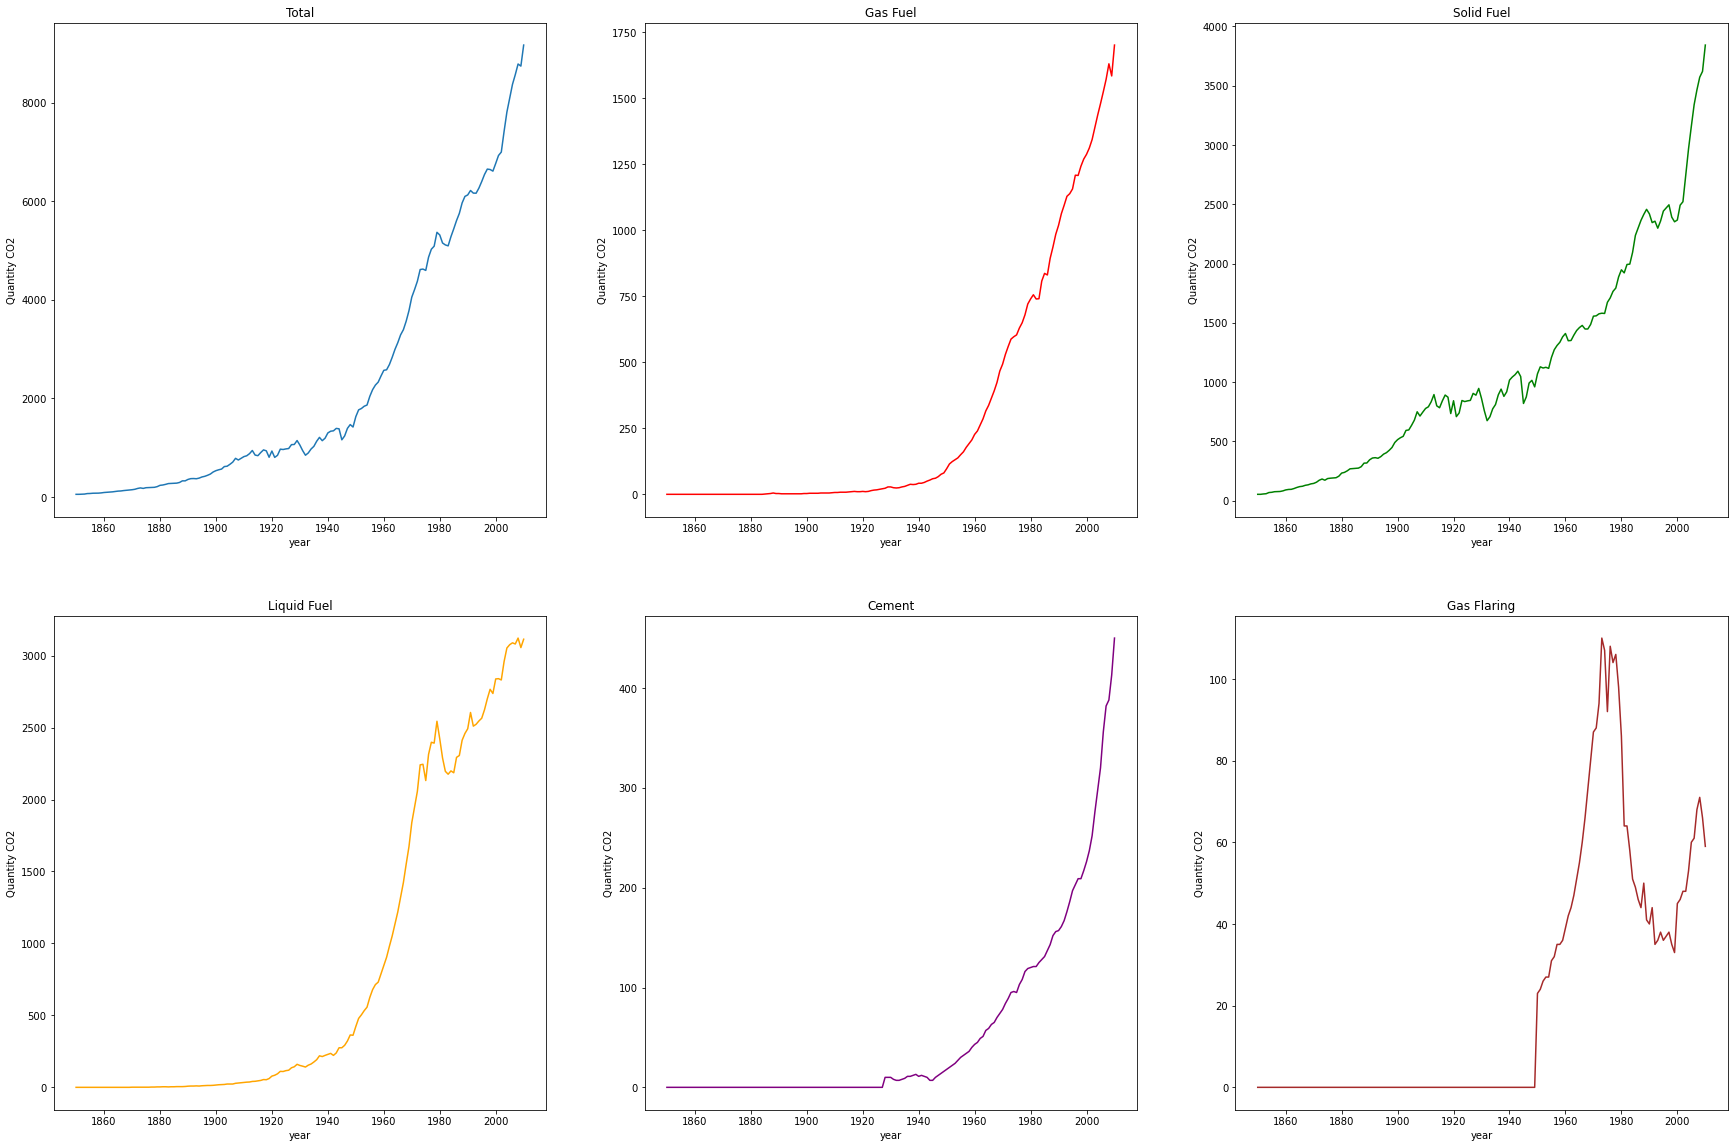

In [18]:
plt.figure(figsize=(30, 20))

plt.subplot(2, 3, 1)
plt.title('Total')
dataset['Total'].plot()
plt.xlabel('year')
plt.ylabel('Quantity CO2')

plt.subplot(2, 3, 2)
plt.title('Gas Fuel')
plt.plot(dataset['Gas Fuel'], color = 'red')
plt.xlabel('year')
plt.ylabel('Quantity CO2')

plt.subplot(2, 3, 3)
plt.title('Solid Fuel')
plt.plot(dataset['Solid Fuel'], color = 'green')
plt.xlabel('year')
plt.ylabel('Quantity CO2')

plt.subplot(2, 3, 4)
plt.title('Liquid Fuel')
plt.plot(dataset['Liquid Fuel'], color = 'orange')
plt.xlabel('year')
plt.ylabel('Quantity CO2')

plt.subplot(2, 3, 5)
plt.title('Cement')
plt.plot(dataset['Cement'], color = 'purple')
plt.xlabel('year')
plt.ylabel('Quantity CO2')

plt.subplot(2, 3, 6)
plt.title('Gas Flaring')
plt.plot(dataset['Gas Flaring'], color = 'brown')
plt.xlabel('year')
plt.ylabel('Quantity CO2')

Dai grafici possiamo notare che il Totale viene influenzato principalmente dal 'Solid Fuel' e d 'Liquid Fuel' che sono i combustibili più dominanti nel mercato.

Analizziamo la correlazione tra la Feature 'Total' e le altre, che rappresentato la produzione di CO2 per ciascun tipo di combustibile per dimostrare quale sia più rilevante. 
Per farlo utilizziamo la seguente formula:

$$ \frac{\sum_{i=1}^n{(x_i-\mu_X)\cdot(y_i-\mu_Y)}}{n\cdot\sigma_X\cdot\sigma_Y} $$

Per facilitare il calcolo usiamo .values per ottenere i valori dalla serie.

In [19]:
total = dataset['Total'].values
gas_fuel = dataset['Gas Fuel'].values
solid_fuel = dataset['Solid Fuel'].values
liquid_fuel = dataset['Liquid Fuel'].values
cement = dataset['Cement'].values
gas_flaring = dataset['Gas Flaring'].values

In [20]:
def correlazione(totale, feature):
    return np.mean((totale-totale.mean()) * (feature-feature.mean())) / (totale.std() * feature.std())

Facciamo la correlazione tra totale e le varie feature: 

In [21]:
features = [gas_fuel, solid_fuel, liquid_fuel, cement, gas_flaring]
corr = []
for feature in features: 
    corr.append(correlazione(total, feature))

max_corr = max(corr)

arg_max = np.argmax(corr)

Possiamo notare che la correlazione massima di ha: 

In [22]:
arg_max, max_corr

(2, 0.9880164785013358)

Che sarebbe la feature 'Solid Fuel', cosi come avevamo potuto notare dai grafici fatti in precedenza. 

### Selezione feature rilevanti

Ai fini dell'elaborazione dei dati del dataframe possiamo notare che abbiamo ancora una feature non rilevante. 

Infatti possiamo notare che per la predizione globale della CO2 dal anno 2010 ad oggi riteniamo irrilevante condiderare il consumo 'per Capita', cioè per persona.  

In [23]:
dataset_reduced = dataset.drop(labels='Per Capita', axis=1)

In [24]:
dataset_reduced

,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring
Year,,,,,,
1850,54,0,0,54,0,0
1851,54,0,0,54,0,0
1852,57,0,0,57,0,0
1853,59,0,0,59,0,0
1854,69,0,0,69,0,0
...,...,...,...,...,...,...
2006,8370,1525,3089,3339,356,61
2007,8566,1572,3081,3464,382,68
2008,8783,1631,3122,3571,388,71


### Regressione Lineare

Partiamo ad analizzare il dataset e a creare il modello tramite l'utilizzo della regressione. 
Avendo però molteplici features non possiamo utilizzare la regressione univariata. 

Quindi utilizzeremo quella MULTIVARIATA.

Definiamo il modello:

In [75]:
from sklearn.linear_model import LinearRegression  

lrm = LinearRegression()

In [76]:
dataset_reduced[1:]

,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring
Year,,,,,,
1851,54,0,0,54,0,0
1852,57,0,0,57,0,0
1853,59,0,0,59,0,0
1854,69,0,0,69,0,0
1855,71,0,0,71,0,0
...,...,...,...,...,...,...
2006,8370,1525,3089,3339,356,61
2007,8566,1572,3081,3464,382,68
2008,8783,1631,3122,3571,388,71


Estraiamo dai dati il vettore y, composto dalla colonna 'Total' e dalla matrice X, composta da tutte le altre colonne del dataset.

In [77]:
y = dataset_reduced['Total']

In [78]:
X = dataset_reduced.drop(columns=["Total"])

### Addestramento del Modello

Individuiamo il training set e il validation set partendo da X e y creati nelle celle precedenti.
Successivamente addestiamo il modello utilizzando LinearRegression utilizzando il metodo fit: 

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = \
    train_test_split(X, y, test_size=1/3, random_state=42)

In [80]:
X_train

,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring
Year,,,,,
1856,0,0,76,0,0
1877,0,2,192,0,0
1926,19,119,846,0,0
1990,1019,2492,2419,157,40
1976,630,2314,1710,103,108
...,...,...,...,...,...
1921,10,84,709,0,0
1956,161,679,1273,32,32
1864,0,0,112,0,0


In [81]:
y_train

Year
1856      76
1877     194
1926     983
1990    6127
1976    4864
        ... 
1921     803
1956    2177
1864     112
1942    1342
1952    1795
Name: Total, Length: 107, dtype: int64

In [82]:
lrm.fit(X_train, y_train)

LinearRegression()